In [1]:
# Module importieren
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
# Daten in PandasDf einlesen
data = pd.read_excel("llr_pseudo_data.xlsx")
print(data.head())

# Data Wrangling
data["Verheiratet"] = data["Verheiratet"].map({"Nein":0,"Ja":1})
print(data.sort_values("Verheiratet", ascending = False))

   Alter Verheiratet
0     30        Nein
1     54          Ja
2     45        Nein
3     33          Ja
4     54        Nein
    Alter  Verheiratet
17     77            1
3      33            1
16     66            1
5      20            1
6      32            1
7      42            1
8      46            1
1      54            1
15     54            1
11     46            1
12     45            1
0      30            0
14     23            0
9      47            0
13     32            0
10     23            0
4      54            0
2      45            0
18     23            0


In [3]:
# x und y Werte definieren
x = data["Alter"].values.reshape(-1,1)
y = data["Verheiratet"].values

# trainings und test daten definieren
train, test = train_test_split(data, test_size = 0.2)

# x_test und y_test Daten formatieren
x_test = test["Alter"].values.reshape(-1,1)
y_test = test["Verheiratet"].values

# x_train und y_train Daten formatieren
x_train = train["Alter"].values.reshape(-1,1)
y_train = train["Verheiratet"].values

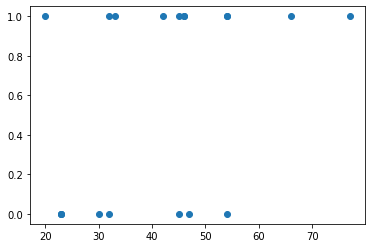

In [4]:
# Einfacher Scatter plot mit x und y
plt.scatter(x,y)
plt.show()

In [5]:
# Logistisches Regressionsmodell erstellen aufgrund Trainingsdaten
model = LogisticRegression().fit(x_train, y_train)

In [6]:
# Confusion Matrix erstellen
y_predict_test = model.predict(x_test)
conf_matrix = metrics.confusion_matrix(y_test, y_predict_test)
print(conf_matrix)

[[0 1]
 [1 2]]


[[9.99598634e-01 4.01366257e-04]
 [9.99591323e-01 4.08676951e-04]
 [9.99583879e-01 4.16120749e-04]
 ...
 [3.77862676e-05 9.99962214e-01]
 [3.71100746e-05 9.99962890e-01]
 [3.64459818e-05 9.99963554e-01]]


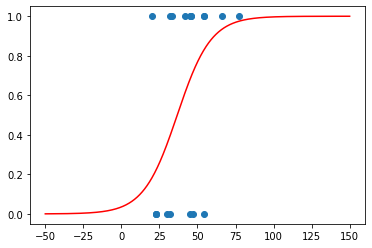

In [9]:
# x_values erstellen, fuer plot
x_values = np.linspace(-50,150,1000).reshape(-1,1)
y_values_prob = model.predict_proba(x_values)
print(y_values_prob)

# Scatterplot mit trainierter logistischer Regression erstellen
plt.scatter(x, y)
plt.plot(x_values, model.predict_proba(x_values)[:,1], c = "r")
plt.show()